In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# Initialize Resnet 
resnet = ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top = False)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
 # don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob('Datasets/Train/*')

In [7]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [8]:
 # our Layer - you cand add more if you want 
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

__________________________________________________________________________________________________
conv3_block4_1_conv (Conv2D)    (None, 28, 28, 128)  65664       conv3_block3_out[0][0]           
__________________________________________________________________________________________________
conv3_block4_1_bn (BatchNormali (None, 28, 28, 128)  512         conv3_block4_1_conv[0][0]        
__________________________________________________________________________________________________
conv3_block4_1_relu (Activation (None, 28, 28, 128)  0           conv3_block4_1_bn[0][0]          
__________________________________________________________________________________________________
conv3_block4_2_conv (Conv2D)    (None, 28, 28, 128)  147584      conv3_block4_1_relu[0][0]        
__________________________________________________________________________________________________
conv3_block4_2_bn (BatchNormali (None, 28, 28, 128)  512         conv3_block4_2_conv[0][0]        
__________

In [34]:
# tell the model what cost and optimaization method to use 
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

In [35]:
# Use the Image data generator to import the images 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trian_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=.2,
                                 zoom_range=.2,
                                 horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1./255)



In [13]:
# Make the size of  target image the same with the initial image 
training_set = trian_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model 
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
 
)

c:\users\ahmed\anaconda3\envs\car_brand\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 10s 5s/step - loss: 4.2818 - accuracy: 0.3594 - val_loss: 9.4882 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 6s 4s/step - loss: 13.2384 - accuracy: 0.3125 - val_loss: 5.7921 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 6s 4s/step - loss: 8.2026 - accuracy: 0.3906 - val_loss: 4.1341 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 6s 4s/step - loss: 4.5887 - accuracy: 0.3750 - val_loss: 10.2746 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 6s 4s/step - loss: 7.5376 - accuracy: 0.3281 - val_loss: 4.0565 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 6s 4s/step - loss: 4.3304 - accuracy: 0.4688 - val_loss: 4.0361 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 6s 4s/step - loss: 3.5141 - accuracy: 0.4375 - val_loss: 2.8444 - val_accuracy: 0.3276
Epoch 8/50
2/2 [======================

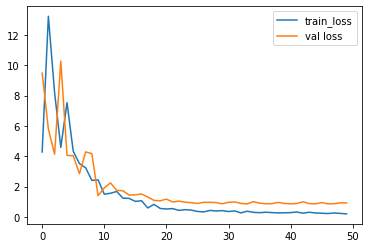

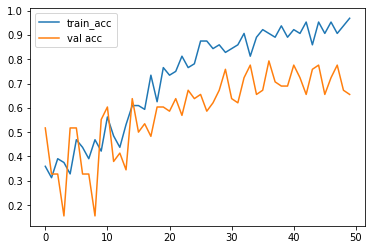

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss 
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'],label ='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['arrcuracy'], label = 'train_acc')
plt.plot(r.history['val_accuracy'],label ='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save the model

from tensorflow.keras.models import load_model
model.save('modle_resnet50.h5')

c:\users\ahmed\anaconda3\envs\car_brand\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[6.2065408e-02, 3.3127649e-03, 9.3462175e-01],
       [5.9752750e-01, 3.5774171e-01, 4.4730745e-02],
       [7.9085213e-01, 7.4253799e-03, 2.0172258e-01],
       [7.4658468e-02, 3.0450996e-03, 9.2229646e-01],
       [9.7832583e-02, 6.3076586e-01, 2.7140158e-01],
       [6.3700728e-02, 8.7675464e-01, 5.9544701e-02],
       [8.7362893e-02, 3.9178544e-01, 5.2085167e-01],
       [9.7845674e-01, 7.4104900e-03, 1.4132814e-02],
       [6.5099128e-02, 1.6874555e-01, 7.6615524e-01],
       [8.2990497e-02, 8.3144343e-01, 8.5566081e-02],
       [8.8579744e-02, 3.0501893e-01, 6.0640132e-01],
       [1.0372869e-01, 1.0828576e-02, 8.8544267e-01],
       [4.1366589e-01, 2.4487211e-01, 3.4146208e-01],
       [4.8859667e-02, 7.5390220e-01, 1.9723813e-01],
       [3.7712303e-01, 4.5194142e-02, 5.7768285e-01],
       [3.0599186e-01, 1.5513954e-01, 5.3886855e-01],
       [4.1504091e-01, 4.3400902e-01, 1.5095009e-01],
       [1.6356733e-01, 6.7624074e-01, 1.6019200e-01],
       [6.7713582e-03, 9.814

In [20]:
y_pred = np.argmax(y_pred,axis=1)

In [21]:
y_pred

array([2, 0, 0, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2,
       1, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0], dtype=int64)

In [22]:
img = image.load_img('Datasets/test/lamborghini/10.jpg',target_size=(224,224))

In [23]:
x =image.img_to_array(img)
x


array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [24]:
x.shape

(224, 224, 3)

In [25]:
x=x/255
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [26]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [27]:
model.predict(img_data)

array([[0.18112162, 0.04503578, 0.77384263]], dtype=float32)

In [28]:
a = np.argmax(model.predict(img_data),axis=1)

In [29]:
a

array([2], dtype=int64)

In [44]:
v= np.median(r.history['accuracy'])
v



0.8125